# K Mean Clustering

### Theory of K-Means Clustering

K-Means Clustering is an unsupervised machine learning algorithm used to partition a dataset into `K` distinct, non-overlapping subsets (clusters). The algorithm aims to minimize the variance within each cluster, thereby ensuring that the data points within a cluster are as similar as possible.

#### Algorithm Steps

1. **Initialization**: Randomly select `K` initial centroids from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming `K` clusters.
3. **Update**: Calculate the new centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or a maximum number of iterations is reached.

#### Mathematical Formulation

The objective of K-Means is to minimize the following cost function:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $K$ is the number of clusters.
- $C_i$ is the set of points in cluster $i$.
- $\mu_i$ is the centroid of cluster $i$.
- $\| x - \mu_i \|^2$ is the squared Euclidean distance between a point $x$ and the centroid $\mu_i$.

### Example

Let's consider a simple example with a dataset of 2D points:



In [7]:
(1, 2), (2, 3), (3, 4), (8, 8), (9, 9), (10, 10)

((1, 2), (2, 3), (3, 4), (8, 8), (9, 9), (10, 10))



We want to partition this dataset into `K=2` clusters.

1. **Initialization**: Randomly select two initial centroids, e.g., (1, 2) and (9, 9).
2. **Assignment**: Assign each point to the nearest centroid:
   - Cluster 1: (1, 2), (2, 3), (3, 4)
   - Cluster 2: (8, 8), (9, 9), (10, 10)
3. **Update**: Calculate the new centroids:
   - Centroid 1: Mean of (1, 2), (2, 3), (3, 4) = (2, 3)
   - Centroid 2: Mean of (8, 8), (9, 9), (10, 10) = (9, 9)
4. **Repeat**: Reassign points to the nearest centroid and update centroids until convergence.

### Use Cases

K-Means Clustering is widely used in various fields for different purposes:

1. **Customer Segmentation**:
   - **Example**: Segmenting customers based on purchasing behavior.
   - **Use**: Helps businesses tailor marketing strategies to different customer groups.

2. **Image Compression**:
   - **Example**: Reducing the number of colors in an image.
   - **Use**: Helps in compressing images by representing similar colors with a single color.

3. **Document Clustering**:
   - **Example**: Grouping similar documents based on content.
   - **Use**: Helps in organizing large collections of documents for easier retrieval.

4. **Anomaly Detection**:
   - **Example**: Identifying unusual patterns in network traffic.
   - **Use**: Helps in detecting fraudulent activities or network intrusions.

5. **Market Basket Analysis**:
   - **Example**: Grouping products frequently bought together.
   - **Use**: Helps in optimizing product placement and cross-selling strategies.

6. **Genomics**:
   - **Example**: Clustering gene expression data.
   - **Use**: Helps in identifying similar gene expression patterns for disease research.

### Conclusion

K-Means Clustering is a powerful and versatile algorithm for partitioning datasets into meaningful clusters. By understanding the underlying theory and practical applications, practitioners can effectively use K-Means to uncover hidden patterns and insights in their data.

In [1]:
class Point:
    '''Represent a point in 2D space'''

    def __init__(self, x, y):
        self._x = x
        self._y = y

    def __str__(self):
        return f'{self._x}, {self._y}'

In [2]:
def distance(p1, p2):
    '''Return the Euclidean distance between p1 and p2'''

    return ((p1._x - p2._x) ** 2 + (p1._y - p2._y) ** 2) ** 0.5


def closest_centroid(point, centroids):
    '''Return the index of the closest centroid to the point'''
    for c in centroids:
        if distance(point, c) == min([distance(point, c) for c in centroids]):
            return c


def points_for_centroid(points, centroid, centroids):
    '''Return the points that belong to the centroid'''
    for p in points:
        if closest_centroid(p, centroids) == centroid:
            yield p

In [ ]:
def build_model(points, k):
    '''Return k centroids that represent the clusters of the points'''

    # Initialize the centroids with the first k points
    centroids = [points[np.random.randint(0, len(points))] for i in range(k)]
    epochs = 30000

    for i in range(epochs):
        for c in centroids:
            x_sum = 0.0
            y_sum = 0.0

            clustered_points = list(points_for_centroid(points, c, centroids))

            for p in clustered_points:
                x_sum += p._x
                y_sum += p._y

            if len(clustered_points) > 0:
                c._x = x_sum / len(clustered_points)
                c._y = y_sum / len(clustered_points)

    return centroids

In [4]:
def plot(points, centroids):
    import matplotlib.pyplot as plt

    x = [point._x for point in points]
    y = [point._y for point in points]

    plt.scatter(x, y, c='blue')

    x = [point._x for point in centroids]
    y = [point._y for point in centroids]

    plt.scatter(x, y, c='red', marker='x')

    plt.show()

In [5]:
import numpy as np
import pandas as pd

def generate_samples(n_samples=300, n_clusters=4, cluster_std=1.0) -> pd.DataFrame:
    np.random.seed(0)
    samples_per_cluster = n_samples // n_clusters
    data = []

    for i in range(n_clusters):
        center_x, center_y = np.random.uniform(-10, 10, 2)
        for _ in range(samples_per_cluster):
            x = np.random.normal(center_x, cluster_std)
            y = np.random.normal(center_y, cluster_std)
            data.append((x, y))

    df = pd.DataFrame(data, columns=['x', 'y'])
    return df

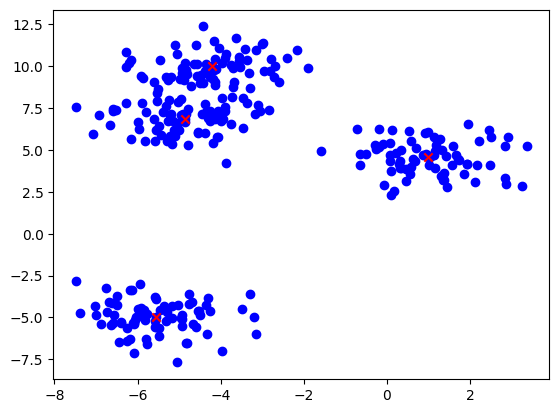

In [6]:

if __name__ == '__main__':
    df = generate_samples()
    points = [
        (Point(row.x, row.y)) for index, row in df.iterrows()]
    res = build_model(points, k=4)
    plot(points, res)
    # generate some test data for 4 clusters